In [2]:
import pandas as pd  
import matplotlib.pylab as plt  
%matplotlib inline  
import numpy as np  
from scipy.stats import linregress  
import scipy.stats as stats  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix  
from matplotlib.colors import ListedColormap  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  


In [3]:
#Janice repo
calendar = pd.read_csv('D:\\YEAR 3\\Semester 2\\backup\\calendar.csv')
evaluation = pd.read_csv('D:\\YEAR 3\\Semester 2\\backup\\sales_train_evaluation.csv')
validation = pd.read_csv('D:\\YEAR 3\\Semester 2\\backup\\sales_train_validation.csv')
sample = pd.read_csv('D:\\YEAR 3\\Semester 2\\backup\\sample_submission.csv')
prices = pd.read_csv('D:\\YEAR 3\\Semester 2\\backup\\sell_prices.csv')


In [4]:
d_cols = [col for col in evaluation.columns if col.startswith('d_')]
d_cols

['d_1',
 'd_2',
 'd_3',
 'd_4',
 'd_5',
 'd_6',
 'd_7',
 'd_8',
 'd_9',
 'd_10',
 'd_11',
 'd_12',
 'd_13',
 'd_14',
 'd_15',
 'd_16',
 'd_17',
 'd_18',
 'd_19',
 'd_20',
 'd_21',
 'd_22',
 'd_23',
 'd_24',
 'd_25',
 'd_26',
 'd_27',
 'd_28',
 'd_29',
 'd_30',
 'd_31',
 'd_32',
 'd_33',
 'd_34',
 'd_35',
 'd_36',
 'd_37',
 'd_38',
 'd_39',
 'd_40',
 'd_41',
 'd_42',
 'd_43',
 'd_44',
 'd_45',
 'd_46',
 'd_47',
 'd_48',
 'd_49',
 'd_50',
 'd_51',
 'd_52',
 'd_53',
 'd_54',
 'd_55',
 'd_56',
 'd_57',
 'd_58',
 'd_59',
 'd_60',
 'd_61',
 'd_62',
 'd_63',
 'd_64',
 'd_65',
 'd_66',
 'd_67',
 'd_68',
 'd_69',
 'd_70',
 'd_71',
 'd_72',
 'd_73',
 'd_74',
 'd_75',
 'd_76',
 'd_77',
 'd_78',
 'd_79',
 'd_80',
 'd_81',
 'd_82',
 'd_83',
 'd_84',
 'd_85',
 'd_86',
 'd_87',
 'd_88',
 'd_89',
 'd_90',
 'd_91',
 'd_92',
 'd_93',
 'd_94',
 'd_95',
 'd_96',
 'd_97',
 'd_98',
 'd_99',
 'd_100',
 'd_101',
 'd_102',
 'd_103',
 'd_104',
 'd_105',
 'd_106',
 'd_107',
 'd_108',
 'd_109',
 'd_110',
 'd_111'

In [5]:
fix = evaluation[d_cols].stack().reset_index(level=1)
fix.columns = ['d','unit_sale']
fix

,d,unit_sale
0,d_1,0
0,d_2,0
0,d_3,0
0,d_4,0
0,d_5,0
...,...,...
30489,d_1937,0
30489,d_1938,2
30489,d_1939,2
30489,d_1940,5


In [6]:
my_data = evaluation.drop(d_cols, axis=1).join(fix)
my_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0
...,...,...,...,...,...,...,...,...
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1937,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1938,2
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1939,2
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1940,5


In [7]:
my_data['id']=my_data['id'].astype('category')
my_data['item_id']=my_data['item_id'].astype('category')
my_data['dept_id']=my_data['dept_id'].astype('category')
my_data['cat_id']=my_data['cat_id'].astype('category')
my_data['store_id']=my_data['store_id'].astype('category')
my_data['state_id']=my_data['state_id'].astype('category')
my_data['d']=my_data['d'].astype('category')

my_data['unit_sale']=pd.to_numeric(my_data['unit_sale'],downcast='unsigned')
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 30489
Data columns (total 8 columns):
 #   Column     Dtype   
---  ------     -----   
 0   id         category
 1   item_id    category
 2   dept_id    category
 3   cat_id     category
 4   store_id   category
 5   state_id   category
 6   d          category
 7   unit_sale  uint16  
dtypes: category(7), uint16(1)
memory usage: 1.1 GB


In [8]:

calendar['date']=calendar['date'].astype('datetime64')

calendar['weekday']=calendar['weekday'].astype('category')
calendar['d']=calendar['d'].astype('category')
calendar['event_name_1']=calendar['event_name_1'].astype('category')
calendar['event_name_2']=calendar['event_name_2'].astype('category')
calendar['event_type_1']=calendar['event_type_1'].astype('category')
calendar['event_type_2']=calendar['event_type_2'].astype('category')
calendar['snap_CA']=calendar['snap_CA'].astype('bool')
calendar['snap_TX']=calendar['snap_TX'].astype('bool')
calendar['snap_WI']=calendar['snap_WI'].astype('bool')

calendar['wm_yr_wk'] = pd.to_numeric(calendar['wm_yr_wk'], downcast='unsigned')
calendar['wday'] = pd.to_numeric(calendar['wday'], downcast='unsigned')
calendar['month'] = pd.to_numeric(calendar['month'], downcast='unsigned')
calendar['year'] = pd.to_numeric(calendar['year'], downcast='unsigned')

calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   uint16        
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   uint8         
 4   month         1969 non-null   uint8         
 5   year          1969 non-null   uint16        
 6   d             1969 non-null   category      
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   bool          
 12  snap_TX       1969 non-null   bool          
 13  snap_WI       1969 non-null   bool          
dtypes: bool(3), category(6), datetime64[ns](1), uint16(2), uint8(2)
memory usage: 128.3 KB


In [9]:
prices['store_id'] = prices['store_id'].astype('category')
prices['item_id'] = prices['item_id'].astype('category')

prices['wm_yr_wk'] = pd.to_numeric(prices['wm_yr_wk'], downcast='unsigned')
prices['sell_price'] = pd.to_numeric(prices['sell_price'], downcast='float')

prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    uint16  
 3   sell_price  float32 
dtypes: category(2), float32(1), uint16(1)
memory usage: 58.8 MB


In [10]:
my_data = my_data.merge(calendar, on='d', how='left').merge(prices, on=['store_id','item_id','wm_yr_wk'], how='left')

In [11]:
my_data['d']=my_data['d'].astype('category')

In [12]:
category_prices = my_data.groupby("cat_id")["sell_price"].mean()

In [13]:
# category_prices

In [14]:
sales_by_category= my_data.groupby("cat_id")["unit_sale"].sum()

In [15]:
# sales_by_category

In [16]:
category_prices_df = pd.DataFrame({'cat_id': category_prices.index, 'mean_price': category_prices.values})
sales_by_category_df = pd.DataFrame({'cat_id': sales_by_category.index, 'sum_sale': sales_by_category.values})
category_df = pd.merge(category_prices_df, sales_by_category_df, on='cat_id')
category_df['revenue'] = category_df['mean_price']*category_df['sum_sale']
category_df

,cat_id,mean_price,sum_sale,revenue
0,FOODS,3.248950,45922427.0,1.491997e+08
1,HOBBIES,5.329613,6240656.0,3.326028e+07
2,HOUSEHOLD,5.465684,14764090.0,8.069586e+07


In [17]:
evaluation_data=evaluation[evaluation.columns[6:]].transpose()
training_dates=pd.to_datetime(calendar['date'])[:evaluation_data.shape[0]]
evaluation_data.index=training_dates
training_dates

0      2011-01-29
1      2011-01-30
2      2011-01-31
3      2011-02-01
4      2011-02-02
          ...    
1936   2016-05-18
1937   2016-05-19
1938   2016-05-20
1939   2016-05-21
1940   2016-05-22
Name: date, Length: 1941, dtype: datetime64[ns]

In [18]:
cat_sales=evaluation.groupby('cat_id').sum().transpose()
cat_sales.index=training_dates
cat_sales

cat_id,FOODS,HOBBIES,HOUSEHOLD
date,,,
2011-01-29,23178,3764,5689
2011-01-30,22758,3357,5634
2011-01-31,17174,2682,3927
2011-02-01,18878,2669,3865
2011-02-02,14603,1814,2729
...,...,...,...
2016-05-18,24790,3740,8566
2016-05-19,24737,3475,8751
2016-05-20,28136,4143,10273


In [19]:
from datetime import datetime

In [20]:
dept_prices = my_data.groupby("dept_id")["sell_price"].mean()
dept_prices

dept_id
FOODS_1        3.373836
FOODS_2        4.081236
FOODS_3        2.840550
HOBBIES_1      6.218061
HOBBIES_2      2.689264
HOUSEHOLD_1    5.054952
HOUSEHOLD_2    5.857228
Name: sell_price, dtype: float32

In [21]:
sales_by_dept = my_data.groupby('dept_id')["unit_sale"].sum()
sales_by_dept

dept_id
FOODS_1         5190400.0
FOODS_2         7795025.0
FOODS_3        32937002.0
HOBBIES_1       5699014.0
HOBBIES_2        541642.0
HOUSEHOLD_1    11722853.0
HOUSEHOLD_2     3041237.0
Name: unit_sale, dtype: float64

In [22]:
dept_prices_df = pd.DataFrame({'dept_id': dept_prices.index, 'mean_price': dept_prices.values})
sales_by_dept_df = pd.DataFrame({'dept_id': sales_by_dept.index, 'sum_sale': sales_by_dept.values})
dept_df = pd.merge(dept_prices_df, sales_by_dept_df, on='dept_id')
dept_df['revenue'] = dept_df['mean_price']*dept_df['sum_sale']
dept_df

,dept_id,mean_price,sum_sale,revenue
0,FOODS_1,3.373836,5190400.0,1.751156e+07
1,FOODS_2,4.081236,7795025.0,3.181334e+07
2,FOODS_3,2.840550,32937002.0,9.355921e+07
3,HOBBIES_1,6.218061,5699014.0,3.543682e+07
4,HOBBIES_2,2.689264,541642.0,1.456618e+06
5,HOUSEHOLD_1,5.054952,11722853.0,5.925846e+07
6,HOUSEHOLD_2,5.857228,3041237.0,1.781322e+07


In [23]:
dept_sales=evaluation.groupby('dept_id').sum().transpose()
dept_sales.index=training_dates
dept_sales

dept_id,FOODS_1,FOODS_2,FOODS_3,HOBBIES_1,HOBBIES_2,HOUSEHOLD_1,HOUSEHOLD_2
date,,,,,,,
2011-01-29,2343,4094,16741,3610,154,4105,1584
2011-01-30,2216,4209,16333,3172,185,3858,1776
2011-01-31,1657,3174,12343,2497,185,2827,1100
2011-02-01,1508,3606,13764,2531,138,2732,1133
2011-02-02,1209,2869,10525,1714,100,1802,927
...,...,...,...,...,...,...,...
2016-05-18,3073,4648,17069,3291,449,6641,1925
2016-05-19,3251,4551,16935,3027,448,6759,1992
2016-05-20,3735,4815,19586,3761,382,7974,2299


In [24]:
state_prices = my_data.groupby("state_id")["sell_price"].mean()
state_prices

state_id
CA    4.415229
TX    4.374402
WI    4.437696
Name: sell_price, dtype: float32

In [25]:
sales_by_state = my_data.groupby('state_id')["unit_sale"].sum()
sales_by_state

state_id
CA    29196717.0
TX    19228405.0
WI    18502051.0
Name: unit_sale, dtype: float64

In [26]:
state_prices_df = pd.DataFrame({'state_id': state_prices.index, 'mean_price': state_prices.values})
sales_by_state_df = pd.DataFrame({'state_id': sales_by_state.index, 'sum_sale': sales_by_state.values})
state_df = pd.merge(state_prices_df, sales_by_state_df, on='state_id')
state_df['revenue'] = state_df['mean_price']*state_df['sum_sale']
state_df

,state_id,mean_price,sum_sale,revenue
0,CA,4.415229,29196717.0,1.289102e+08
1,TX,4.374402,19228405.0,8.411277e+07
2,WI,4.437696,18502051.0,8.210649e+07


In [27]:
state_sales=evaluation.groupby('state_id').sum().transpose()
state_sales.index=training_dates
state_sales

state_id,CA,TX,WI
date,,,
2011-01-29,14195,9438,8998
2011-01-30,13805,9630,8314
2011-01-31,10108,6778,6897
2011-02-01,11047,7381,6984
2011-02-02,9925,5912,3309
...,...,...,...
2016-05-18,15678,10375,11043
2016-05-19,16297,9162,11504
2016-05-20,17430,12303,12819


In [28]:
store_prices = my_data.groupby("store_id")["sell_price"].mean()
store_prices

store_id
CA_1    4.412670
CA_2    4.444537
CA_3    4.386149
CA_4    4.420126
TX_1    4.372742
TX_2    4.364846
TX_3    4.385783
WI_1    4.456892
WI_2    4.440573
WI_3    4.416549
Name: sell_price, dtype: float32

In [29]:
sales_by_store = my_data.groupby('store_id')["unit_sale"].sum()
sales_by_store

store_id
CA_1     7832248.0
CA_2     5818395.0
CA_3    11363540.0
CA_4     4182534.0
TX_1     5692823.0
TX_2     7329642.0
TX_3     6205940.0
WI_1     5261506.0
WI_2     6697988.0
WI_3     6542557.0
Name: unit_sale, dtype: float64

In [30]:
store_prices_df = pd.DataFrame({'store_id': store_prices.index, 'mean_price': store_prices.values})
sales_by_store_df = pd.DataFrame({'store_id': sales_by_store.index, 'sum_sale': sales_by_store.values})
store_df = pd.merge(store_prices_df, sales_by_store_df, on='store_id')
store_df['revenue'] = store_df['mean_price']*store_df['sum_sale']
store_df

,store_id,mean_price,sum_sale,revenue
0,CA_1,4.412670,7832248.0,3.456112e+07
1,CA_2,4.444537,5818395.0,2.586007e+07
2,CA_3,4.386149,11363540.0,4.984218e+07
3,CA_4,4.420126,4182534.0,1.848733e+07
4,TX_1,4.372742,5692823.0,2.489324e+07
5,TX_2,4.364846,7329642.0,3.199276e+07
6,TX_3,4.385783,6205940.0,2.721791e+07
7,WI_1,4.456892,5261506.0,2.344997e+07
8,WI_2,4.440573,6697988.0,2.974290e+07
9,WI_3,4.416549,6542557.0,2.889552e+07


In [31]:
store_sales=evaluation.groupby('store_id').sum().transpose()
store_sales.index=training_dates
store_sales

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
date,,,,,,,,,,
2011-01-29,4337,3494,4739,1625,2556,3852,3030,2704,2256,4038
2011-01-30,4155,3046,4827,1777,2687,3937,3006,2194,1922,4198
2011-01-31,2816,2121,3785,1386,1822,2731,2225,1562,2018,3317
2011-02-01,3051,2324,4232,1440,2258,2954,2169,1251,2522,3211
2011-02-02,2630,1942,3817,1536,1694,2492,1726,2,1175,2132
...,...,...,...,...,...,...,...,...,...,...
2016-05-18,3995,3789,5375,2519,3147,3518,3710,3242,4533,3268
2016-05-19,4136,4037,5580,2544,2748,3126,3288,3478,4628,3398
2016-05-20,4433,4751,5542,2704,3664,4249,4390,3813,4880,4126


In [32]:
hobbies_1=my_data[my_data['dept_id']=="HOBBIES_1"]
hobbies_1

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_2,0,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
2,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,False,False,False,NaN
3,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,True,True,False,NaN
4,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,True,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54070432,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1937,0,2016-05-18,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070433,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1938,0,2016-05-19,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070434,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1939,0,2016-05-20,11616,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070435,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1940,1,2016-05-21,11617,...,5,2016,NaN,NaN,NaN,NaN,False,False,False,1.77


In [33]:
hobbies_1 = hobbies_1.drop(hobbies_1[hobbies_1['unit_sale'] == 0].index)
hobbies_1

,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sale,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
901,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_902,1,2013-07-18,11325,...,7,2013,NaN,NaN,NaN,NaN,False,False,False,9.58
916,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_917,2,2013-08-02,11327,...,8,2013,NaN,NaN,NaN,NaN,True,False,True,8.26
918,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_919,1,2013-08-04,11328,...,8,2013,NaN,NaN,NaN,NaN,True,False,False,8.26
919,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_920,1,2013-08-05,11328,...,8,2013,NaN,NaN,NaN,NaN,True,True,True,8.26
925,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_926,1,2013-08-11,11329,...,8,2013,NaN,NaN,NaN,NaN,False,True,True,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54070406,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1911,2,2016-04-22,11612,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070407,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1912,3,2016-04-23,11613,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070411,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1916,1,2016-04-27,11613,...,4,2016,NaN,NaN,NaN,NaN,False,False,False,1.77
54070419,HOBBIES_1_424_WI_3_evaluation,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI_3,WI,d_1924,1,2016-05-05,11614,...,5,2016,Cinco De Mayo,Cultural,NaN,NaN,True,True,True,1.77


In [34]:
h1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = hobbies_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        hobbies_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        hobbies_1_df = hobbies_1_df.dropna()

        h1_df = h1_df.append(hobbies_1_df, ignore_index=True)

h1_df['price_change'] = h1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
h1_df['sale_change'] = h1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
h1_df['elasticity'] = -h1_df['sale_change'] / h1_df['price_change']

h1_df = h1_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3056834730.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h1_df = h1_df.append(hobbies_1_df, ignore_index=True)


In [35]:
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,3.656489
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,3.944386
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,1.75816
...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,9.568625
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,2.246694
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692


In [37]:
level_values = []


for elasticity in h1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


h1_df['level'] = level_values
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,3.656489,Elastic Demand
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726,Elastic Demand
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627,Elastic Demand
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,3.944386,Elastic Demand
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,1.75816,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388,Elastic Demand
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,9.568625,Elastic Demand
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,2.246694,Elastic Demand
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692,Elastic Demand


In [38]:
h1_df[h1_df['price_change'] ==h1_df['price_change'].max()]

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
7730,HOBBIES_1_338,HOBBIES_1,HOBBIES,WI,8.88,2013,1.466667,887.000031,0.466667,-0.000526,Inelastic Demand


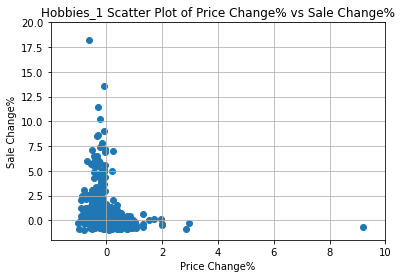

In [39]:
plt.scatter(h1_df['price_change'], h1_df['sale_change'])

plt.title('Hobbies_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(h1_df['price_change'].min()-1, 10)
plt.ylim(h1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2543827168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_h1 = Vis_h1.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

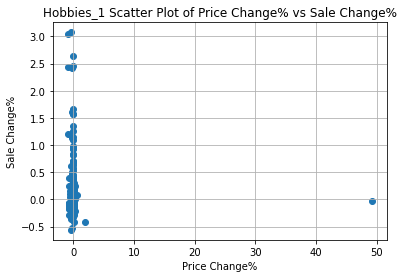

In [40]:
Vis_h1 = pd.DataFrame()

for item_id in h1_df['item_id'].unique():
    entry_df = h1_df[h1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_h1 = Vis_h1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_h1['price_change'], Vis_h1['sale_change'])

plt.title('Hobbies_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

In [41]:
h1_df["revenue"] = h1_df["price"]*h1_df["sale_perday"]
h1_df["LB_price"] = h1_df["price"] - (0.5*h1_df["price"])
h1_df["UB_price"] = h1_df["price"] + (0.5*h1_df["price"])
h1_df["elasticity"] = -abs(h1_df["elasticity"])
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,-3.656489,Elastic Demand,12.421527,4.13,12.39
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726,Elastic Demand,14.427423,4.19,12.57
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627,Elastic Demand,10.972239,4.13,12.39
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,-3.944386,Elastic Demand,9.482,4.31,12.93
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,-1.75816,Elastic Demand,9.669231,4.19,12.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388,Elastic Demand,2.863158,0.8,2.4
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,-9.568625,Elastic Demand,6.5,0.65,1.95
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,-2.246694,Elastic Demand,3.381705,0.82,2.46
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692,Elastic Demand,3.744337,0.82,2.46


In [42]:
import pandas as pd
from scipy.optimize import minimize

# Assuming h1_df is your DataFrame
# Define the objective function to be minimized
def objective(opti_price, row):
    # Calculate optimized units and revenue for the current row
    optimized_units = row["sale_perday"] + (row["sale_perday"]*((opti_price/row["price"]) - 1)*(row["elasticity"]))
    optimized_revenue = optimized_units * opti_price
    return -sum(optimized_revenue)

In [43]:
for index, row in h1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    h1_df.at[index, "opti_price"] = result.x
    h1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    h1_df.at[index, "optimized_revenue"] = h1_df.at[index, "optimized_units"] * result.x


In [44]:
h1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.26,2013,1.503817,-0.137787,0.503817,-3.656489,Elastic Demand,12.421527,4.13,12.39,5.259499,3.501253,18.414839
5,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA,8.38,2016,1.721649,0.014528,0.057512,-3.958726,Elastic Demand,14.427423,4.19,12.57,5.248421,4.268594,22.403380
7,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.26,2013,1.328358,-0.137787,-0.240938,-1.748627,Elastic Demand,10.972239,4.13,12.39,6.491853,1.825581,11.851402
8,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.62,2013,1.1,0.043583,-0.17191,-3.944386,Elastic Demand,9.482,4.31,12.93,5.402692,2.719412,14.692147
9,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX,8.38,2013,1.153846,-0.027842,0.048951,-1.75816,Elastic Demand,9.669231,4.19,12.57,6.573172,1.591246,10.459537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9802,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.6,2011,1.789474,-0.096045,-0.166099,-1.729388,Elastic Demand,2.863158,0.8,2.4,1.262592,2.442084,3.083354
9803,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.3,2011,5.0,-0.1875,1.794118,-9.568625,Elastic Demand,6.5,0.65,1.95,0.717930,26.421564,18.968841
9804,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2011,2.062016,0.261538,-0.587597,-2.246694,Elastic Demand,3.381705,0.82,2.46,1.184981,3.347366,3.966565
9806,HOBBIES_1_424,HOBBIES_1,HOBBIES,WI,1.64,2012,2.283133,-0.073446,-0.084514,-1.150692,Elastic Demand,3.744337,0.82,2.46,1.532615,2.455157,3.762810


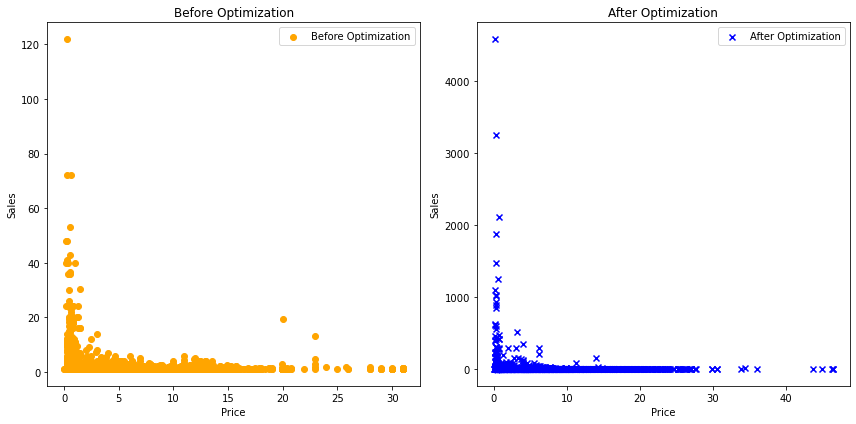

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(h1_df["price"], h1_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(h1_df["opti_price"], h1_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

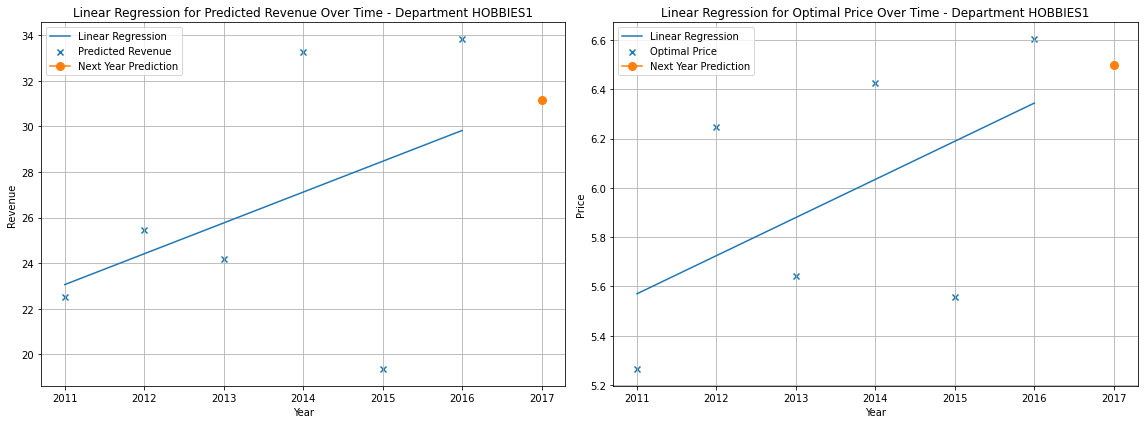

In [46]:
from scipy.stats import linregress
    
yearly_predicted_revenue = h1_df.groupby('year')['optimized_revenue'].mean()
yearly_optimal_price = h1_df.groupby('year')['opti_price'].mean()

slope_revenue, intercept_revenue, _, _, _ = linregress(yearly_predicted_revenue.index, yearly_predicted_revenue)
line_revenue = slope_revenue * yearly_predicted_revenue.index + intercept_revenue

# Linear regression for optimal price
slope_price, intercept_price, _, _, _ = linregress(yearly_optimal_price.index, yearly_optimal_price)
line_price = slope_price * yearly_optimal_price.index + intercept_price

next_year = max(yearly_predicted_revenue.index) + 1
future_revenue_prediction = slope_revenue * next_year + intercept_revenue
future_price_prediction = slope_price * next_year + intercept_price

plt.figure(figsize=(16, 6))

# Plot linear regression for predicted revenue
plt.subplot(1, 2, 1)
plt.plot(yearly_predicted_revenue.index, line_revenue, label='Linear Regression')
plt.scatter(yearly_predicted_revenue.index, yearly_predicted_revenue, marker='x', label='Predicted Revenue')
plt.plot([next_year], [future_revenue_prediction], marker='o', markersize=8, label='Next Year Prediction')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title(f'Linear Regression for Predicted Revenue Over Time - Department HOBBIES1')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(yearly_optimal_price.index, line_price, label='Linear Regression')
plt.scatter(yearly_optimal_price.index, yearly_optimal_price, marker='x', label='Optimal Price')
plt.plot([next_year], [future_price_prediction], marker='o', markersize=8, label='Next Year Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title(f'Linear Regression for Optimal Price Over Time - Department HOBBIES1')
plt.legend()
plt.grid(True)

plt.tight_layout()


In [47]:
hobbies_2=my_data[my_data['dept_id']=="HOBBIES_2"]
hobbies_2 = hobbies_2.drop(hobbies_2[hobbies_2['unit_sale'] == 0].index)

In [48]:
h2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = hobbies_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        hobbies_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        hobbies_2_df = hobbies_2_df.dropna()

        h2_df = h2_df.append(hobbies_2_df, ignore_index=True)

h2_df['price_change'] = h2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
h2_df['sale_change'] = h2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
h2_df['elasticity'] = -h2_df['sale_change'] / h2_df['price_change']

h2_df = h2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1342398043.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h2_df = h2_df.append(hobbies_2_df, ignore_index=True)


In [49]:
# hobbies_2=my_data[my_data['dept_id']=="HOBBIES_2"]
# hobbies_2 = hobbies_2.drop(hobbies_2[hobbies_2['unit_sale'] == 0].index)

# h2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in hobbies_2['item_id'].unique():
#     entry_df = hobbies_2[hobbies_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 hobbies_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 hobbies_2_df = hobbies_2_df.dropna()
                
#                 h2_df = h2_df.append(hobbies_2_df, ignore_index=True)

#                 h2_df['price_change'] = h2_df['price'].pct_change()*100
#                 h2_df['sale_change'] = h2_df['sale_perday'].pct_change()*100
#                 h2_df['elasticity'] = -h2_df['sale_change']/h2_df['price_change'] 
# h2_df=h2_df.dropna()
# h2_df

In [50]:
level_values = []


for elasticity in h2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


h2_df['level'] = level_values
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,0.464333,Inelastic Demand
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,0.225228,Inelastic Demand
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,0.18017,Inelastic Demand
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand


In [51]:
# Vis_h2 = pd.DataFrame()

# for item_id in h2_df['item_id'].unique():
#     entry_df = h2_df[h2_df['item_id'] == item_id]
    
#     price_change = entry_df["price_change"].mean()
#     sale_change = entry_df["sale_change"].mean()
#     elasticity = entry_df["elasticity"].mean()
    
#     Vis_h2 = Vis_h2.append({'item_id': item_id,
#                     'price_change': price_change,
#                     'sale_change': sale_change,
#                     'elasticity': elasticity},ignore_index=True)

# #V1   
# plt.scatter(Vis_h2['price_change'], Vis_h2['sale_change'])

# plt.title('Hobbies_2 Scatter Plot of Price Change% vs Sale Change%')
# plt.xlabel('Price Change%')
# plt.ylabel('Sale Change%')
# plt.grid(True)

# plt.show()

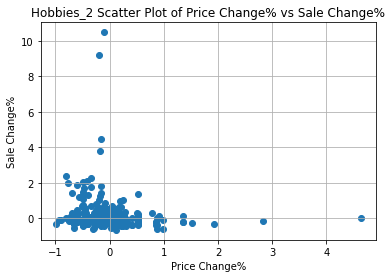

In [52]:
plt.scatter(h2_df['price_change'], h2_df['sale_change'])

plt.title('Hobbies_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(h2_df['price_change'].min()-1, 10)
# plt.ylim(h2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [53]:
h2_df["revenue"] = h2_df["price"]*h2_df["sale_perday"]
h2_df["LB_price"] = h2_df["price"] - (0.5*h2_df["price"])
h2_df["UB_price"] = h2_df["price"] + (0.5*h2_df["price"])
h2_df["elasticity"] = -abs(h2_df["elasticity"])
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand,6.90647,2.985,8.955
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,-0.464333,Inelastic Demand,6.017,2.735,8.205
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand,4.47,2.235,6.705
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand,2.97,1.485,4.455
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand,6.3,2.835,8.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand,1.268571,0.44,1.32
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,-0.225228,Inelastic Demand,1.524286,0.485,1.455
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,-0.18017,Inelastic Demand,1.614199,0.485,1.455
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand,0.5,0.25,0.75


In [54]:
for index, row in h2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    h2_df.at[index, "opti_price"] = result.x
    h2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    h2_df.at[index, "optimized_revenue"] = h2_df.at[index, "optimized_units"] * result.x

In [55]:
h2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
2,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.97,2012,1.156863,0.05291,0.028322,-0.535295,Inelastic Demand,6.90647,2.985,8.955,8.561368,0.888063,7.603031
5,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,5.47,2014,1.1,-0.083752,0.038889,-0.464333,Inelastic Demand,6.017,2.735,8.205,8.205000,0.844617,6.930080
7,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA,4.47,2015,1.0,-0.182815,-0.12,-0.6564,Inelastic Demand,4.47,2.235,6.705,5.639937,0.828200,4.670995
10,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,2.97,2011,1.0,-0.457038,-0.09589,-0.209808,Inelastic Demand,2.97,1.485,4.455,4.455000,0.895096,3.987652
11,HOBBIES_2_001,HOBBIES_2,HOBBIES,TX,5.67,2011,1.111111,0.909091,0.111111,-0.122222,Inelastic Demand,6.3,2.835,8.505,8.505000,1.043210,8.872500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI,0.88,2013,1.441558,0.142857,0.190853,-1.335968,Elastic Demand,1.268571,0.44,1.32,0.769349,1.683717,1.295367
2851,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA,0.97,2014,1.571429,-0.607287,0.136778,-0.225228,Inelastic Demand,1.524286,0.485,1.455,1.455000,1.394464,2.028945
2856,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.97,2014,1.664122,-0.607287,0.109415,-0.18017,Inelastic Demand,1.614199,0.485,1.455,1.455000,1.514210,2.203176
2858,HOBBIES_2_149,HOBBIES_2,HOBBIES,TX,0.5,2015,1.0,-0.484536,-0.450549,-0.929857,Inelastic Demand,0.5,0.25,0.75,0.518858,0.964929,0.500661


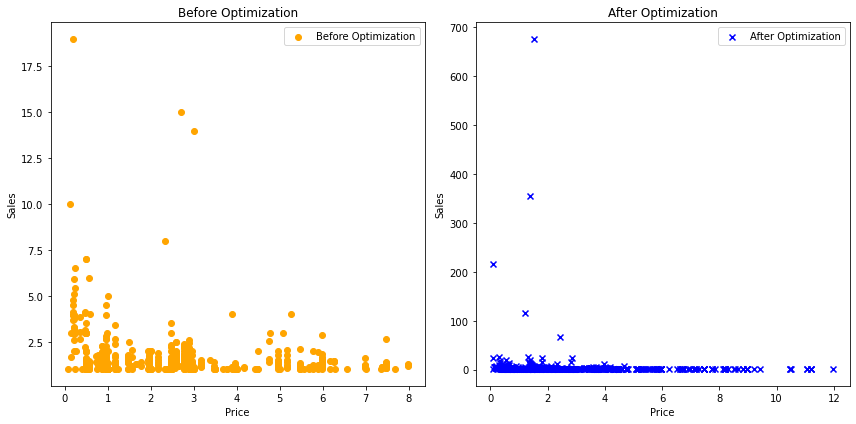

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(h2_df["price"], h2_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(h2_df["opti_price"], h2_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [57]:
food_1=my_data[my_data['dept_id']=="FOODS_1"]
food_1 = food_1.drop(food_1[food_1['unit_sale'] == 0].index)

In [58]:
f1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_1_df = foods_1_df.dropna()

        f1_df = f1_df.append(foods_1_df, ignore_index=True)

f1_df['price_change'] = f1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f1_df['sale_change'] = f1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f1_df['elasticity'] = -f1_df['sale_change'] / f1_df['price_change']

f1_df = f1_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3941913805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1_df = f1_df.append(foods_1_df, ignore_index=True)


In [59]:


# f1_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_1['item_id'].unique():
#     entry_df = food_1[food_1['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_1_df = food_1_df.dropna()
                
#                 f1_df = f1_df.append(food_1_df, ignore_index=True)

#                 f1_df['price_change'] = f1_df['price'].pct_change()*100
#                 f1_df['sale_change'] = f1_df['sale_perday'].pct_change()*100
#                 f1_df['elasticity'] = -f1_df['sale_change']/f1_df['price_change'] 
# f1_df=f1_df.dropna()
# f1_df

In [60]:
level_values = []


for elasticity in f1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f1_df['level'] = level_values
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,0.886387,Inelastic Demand
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,1.645271,Elastic Demand
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,4.585538,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,1.675926,Elastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1510488168.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f1 = Vis_f1.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

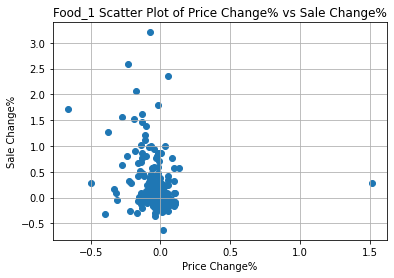

In [61]:
Vis_f1 = pd.DataFrame()

for item_id in f1_df['item_id'].unique():
    entry_df = f1_df[f1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f1 = Vis_f1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f1['price_change'], Vis_f1['sale_change'])

plt.title('Food_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

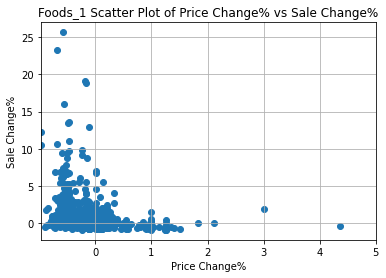

In [62]:
plt.scatter(f1_df['price_change'], f1_df['sale_change'])

plt.title('Foods_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(f1_df['price_change'].min(), 5)
# plt.ylim(h1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [63]:
f1_df["revenue"] = f1_df["price"]*f1_df["sale_perday"]
f1_df["LB_price"] = f1_df["price"] - (0.5*f1_df["price"])
f1_df["UB_price"] = f1_df["price"] + (0.5*f1_df["price"])
f1_df["elasticity"] = -abs(f1_df["elasticity"])
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand,1.75,0.875,2.625
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,-0.886387,Inelastic Demand,4.547116,1.12,3.36
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,-1.645271,Elastic Demand,4.5,1.0,3.0
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand,3.0,1.0,3.0
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,-4.585538,Elastic Demand,5.95,0.595,1.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand,11.305001,0.595,1.785
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand,10.258824,1.09,3.27
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand,8.116379,0.875,2.625
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,-1.675926,Elastic Demand,5.513846,1.12,3.36


In [64]:
for index, row in f1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f1_df.at[index, "opti_price"] = result.x
    f1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f1_df.at[index, "optimized_revenue"] = f1_df.at[index, "optimized_units"] * result.x

In [65]:
f1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_1_001,FOODS_1,FOODS,CA,1.75,2011,1.0,-0.125,-0.561806,-4.494449,Elastic Demand,1.75,0.875,2.625,1.069685,2.747224,2.938664
3,FOODS_1_001,FOODS_1,FOODS,CA,2.24,2012,2.029963,0.12,-0.106366,-0.886387,Inelastic Demand,4.547116,1.12,3.36,2.383556,1.914647,4.563670
5,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2013,2.25,-0.107143,0.176279,-1.645271,Elastic Demand,4.5,1.0,3.0,1.607803,2.975930,4.784708
7,FOODS_1_001,FOODS_1,FOODS,CA,2.0,2014,1.5,-0.107143,-0.277828,-2.593062,Elastic Demand,3.0,1.0,3.0,1.385644,2.694796,3.734030
12,FOODS_1_001,FOODS_1,FOODS,TX,1.19,2012,5.0,-0.405,1.857143,-4.585538,Elastic Demand,5.95,0.595,1.785,0.724756,13.963846,10.120378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,FOODS_1_219,FOODS_1,FOODS,TX,1.19,2013,9.5,0.19,1.375,-7.23684,Elastic Demand,11.305001,0.595,1.785,0.677218,39.124990,26.496157
6123,FOODS_1_219,FOODS_1,FOODS,WI,2.18,2011,4.705882,0.09,0.065515,-0.727941,Inelastic Demand,10.258824,1.09,3.27,2.587373,4.065745,10.519599
6124,FOODS_1_219,FOODS_1,FOODS,WI,1.75,2011,4.637931,-0.197248,-0.01444,-0.073206,Inelastic Demand,8.116379,0.875,2.625,2.625000,4.468170,11.728945
6125,FOODS_1_219,FOODS_1,FOODS,WI,2.24,2011,2.461538,0.28,-0.469259,-1.675926,Elastic Demand,5.513846,1.12,3.36,1.788287,3.293448,5.889630


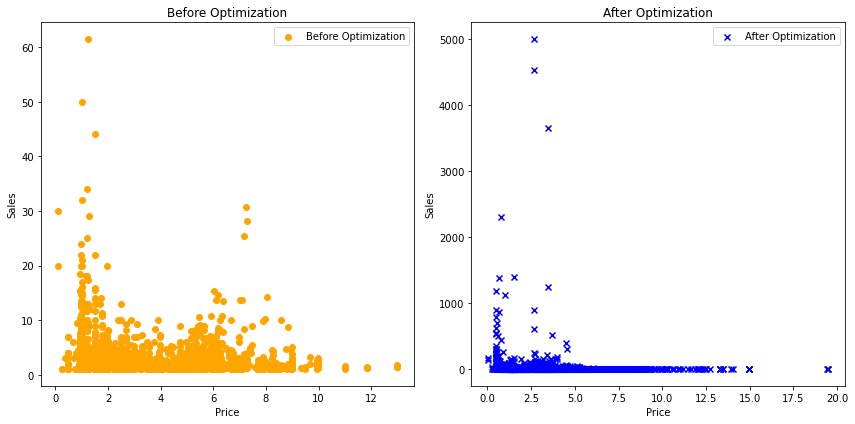

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(f1_df["price"], f1_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(f1_df["opti_price"], f1_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [67]:
food_2=my_data[my_data['dept_id']=="FOODS_2"]
food_2 = food_2.drop(food_2[food_2['unit_sale'] == 0].index)

In [68]:
f2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_2_df = foods_2_df.dropna()

        f2_df = f2_df.append(foods_2_df, ignore_index=True)

f2_df['price_change'] = f2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f2_df['sale_change'] = f2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f2_df['elasticity'] = -f2_df['sale_change'] / f2_df['price_change']

f2_df = f2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2715198107.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f2_df = f2_df.append(foods_2_df, ignore_index=True)


In [69]:
# food_2=my_data[my_data['dept_id']=="FOODS_2"]
# food_2 = food_2.drop(food_2[food_2['unit_sale'] == 0].index)

# f2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_2['item_id'].unique():
#     entry_df = food_2[food_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_2_df = food_2_df.dropna()
                
#                 f2_df = f2_df.append(food_2_df, ignore_index=True)

#                 f2_df['price_change'] = f2_df['price'].pct_change()*100
#                 f2_df['sale_change'] = f2_df['sale_perday'].pct_change()*100
#                 f2_df['elasticity'] = -f2_df['sale_change']/f2_df['price_change'] 
# f2_df=f2_df.dropna()
# f2_df

In [70]:
level_values = []


for elasticity in f2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f2_df['level'] = level_values
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,1.433303,Elastic Demand
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,2.277675,Elastic Demand
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,3.425396,Elastic Demand
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,0.641712,Inelastic Demand
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,4.315047,Elastic Demand
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,1.898668,Elastic Demand
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3997995057.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f2 = Vis_f2.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

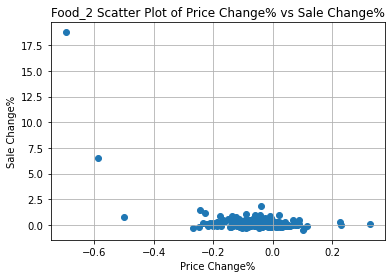

In [71]:
Vis_f2 = pd.DataFrame()

for item_id in f2_df['item_id'].unique():
    entry_df = f2_df[f2_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f2 = Vis_f2.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f2['price_change'], Vis_f2['sale_change'])

plt.title('Food_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

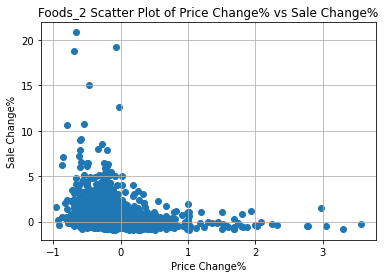

In [72]:
plt.scatter(f2_df['price_change'], f2_df['sale_change'])

plt.title('Foods_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(f2_df['price_change'].min(), 5)
# plt.ylim(f2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [73]:
f2_df["revenue"] = f2_df["price"]*f2_df["sale_perday"]
f2_df["LB_price"] = f2_df["price"] - (0.5*f2_df["price"])
f2_df["UB_price"] = f2_df["price"] + (0.5*f2_df["price"])
f2_df["elasticity"] = -abs(f2_df["elasticity"])
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,-1.433303,Elastic Demand,3.68463,0.985,2.955
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,-2.277675,Elastic Demand,2.736,1.14,3.42
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,-3.425396,Elastic Demand,3.259259,0.88,2.64
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand,4.111852,0.91,2.73
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand,3.622912,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,-0.641712,Inelastic Demand,4.2,1.05,3.15
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,-4.315047,Elastic Demand,3.928219,1.07,3.21
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,-1.898668,Elastic Demand,4.021333,1.04,3.12
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand,5.105528,1.0,3.0


In [74]:
for index, row in f2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f2_df.at[index, "opti_price"] = result.x
    f2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f2_df.at[index, "optimized_revenue"] = f2_df.at[index, "optimized_units"] * result.x

In [75]:
f2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_2_001,FOODS_2,FOODS,CA,1.97,2011,1.87037,-0.172269,0.246914,-1.433303,Elastic Demand,3.68463,0.985,2.955,1.672224,2.275589,3.805294
2,FOODS_2_001,FOODS_2,FOODS,CA,2.28,2011,1.2,0.15736,-0.358416,-2.277675,Elastic Demand,2.736,1.14,3.42,1.640510,1.966605,3.226236
8,FOODS_2_001,FOODS_2,FOODS,TX,1.76,2011,1.851852,0.060241,-0.206349,-3.425396,Elastic Demand,3.259259,0.88,2.64,1.136905,4.097589,4.658568
9,FOODS_2_001,FOODS_2,FOODS,TX,1.82,2011,2.259259,0.034091,0.22,-6.453327,Elastic Demand,4.111852,0.91,2.73,1.051013,8.419499,8.848999
11,FOODS_2_001,FOODS_2,FOODS,TX,2.0,2012,1.811456,0.136364,0.096253,-0.705857,Inelastic Demand,3.622912,1.0,3.0,2.416718,1.545042,3.733931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12056,FOODS_2_399,FOODS_2,FOODS,WI,2.1,2014,2.0,0.05,-0.032086,-0.641712,Inelastic Demand,4.2,1.05,3.15,2.686248,1.641712,4.410046
12057,FOODS_2_399,FOODS_2,FOODS,WI,2.14,2014,1.835616,0.019048,-0.082192,-4.315047,Elastic Demand,3.928219,1.07,3.21,1.317970,4.878194,6.429311
12058,FOODS_2_399,FOODS_2,FOODS,WI,2.08,2014,1.933333,-0.028037,0.053234,-1.898668,Elastic Demand,4.021333,1.04,3.12,1.587752,2.802045,4.448954
12060,FOODS_2_399,FOODS_2,FOODS,WI,2.0,2015,2.552764,-0.038462,-0.021121,-0.549137,Inelastic Demand,5.105528,1.0,3.0,2.821039,1.977291,5.578013


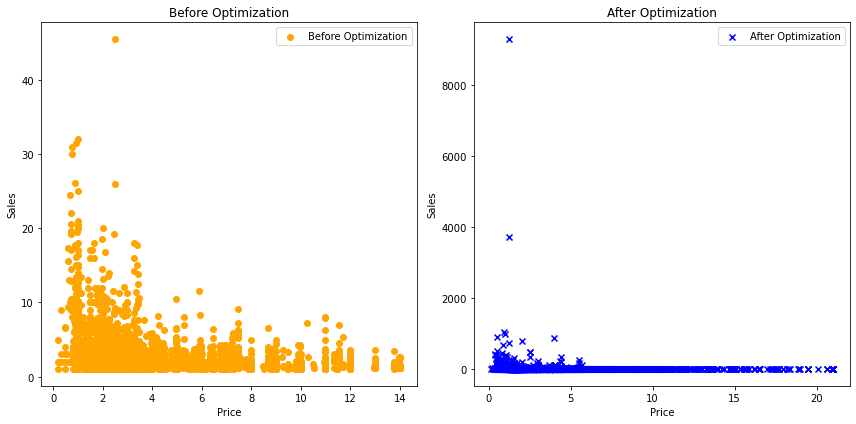

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(f2_df["price"], f2_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(f2_df["opti_price"], f2_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [77]:
food_3=my_data[my_data['dept_id']=="FOODS_3"]
food_3 = food_3.drop(food_3[food_3['unit_sale'] == 0].index)

In [78]:
f3_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = food_3.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        foods_3_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        foods_3_df = foods_3_df.dropna()

        f3_df = f3_df.append(foods_3_df, ignore_index=True)

f3_df['price_change'] = f3_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
f3_df['sale_change'] = f3_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
f3_df['elasticity'] = -f3_df['sale_change'] / f3_df['price_change']

f3_df = f3_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2030387177.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f3_df = f3_df.append(foods_3_df, ignore_index=True)


In [79]:
# food_3=my_data[my_data['dept_id']=="FOODS_3"]
# food_3 = food_3.drop(food_3[food_3['unit_sale'] == 0].index)

# f3_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in food_3['item_id'].unique():
#     entry_df = food_3[food_3['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 food_3_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 food_3_df = food_3_df.dropna()
                
#                 f3_df = f3_df.append(food_3_df, ignore_index=True)

#                 f3_df['price_change'] = f3_df['price'].pct_change()*100
#                 f3_df['sale_change'] = f3_df['sale_perday'].pct_change()*100
#                 f3_df['elasticity'] = -f3_df['sale_change']/f3_df['price_change'] 
# f3_df=f3_df.dropna()
# f3_df

In [80]:
level_values = []


for elasticity in f3_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


f3_df['level'] = level_values
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,0.757697,Inelastic Demand
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,0.64486,Inelastic Demand
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,3.620877,Elastic Demand
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,0.39955,Inelastic Demand
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,0.961837,Inelastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3148200878.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_f3 = Vis_f3.append({'item_id': item_id,
C:\Users\hp\AppData\Loca

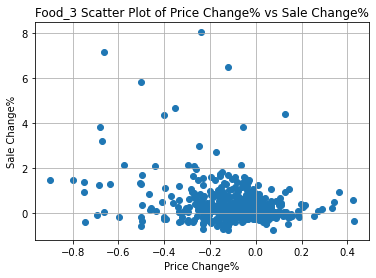

In [81]:
Vis_f3 = pd.DataFrame()

for item_id in f3_df['item_id'].unique():
    entry_df = f3_df[f3_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_f3 = Vis_f3.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_f3['price_change'], Vis_f3['sale_change'])

plt.title('Food_3 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

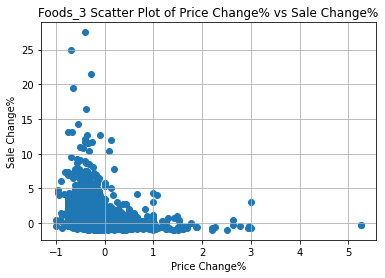

In [82]:
plt.scatter(f3_df['price_change'], f3_df['sale_change'])

plt.title('Foods_3 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(f3_df['price_change'].min(), 5)
# plt.ylim(h3_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [83]:
f3_df["revenue"] = f3_df["price"]*f3_df["sale_perday"]
f3_df["LB_price"] = f3_df["price"] - (0.5*f3_df["price"])
f3_df["UB_price"] = f3_df["price"] + (0.5*f3_df["price"])
f3_df["elasticity"] = -abs(f3_df["elasticity"])
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,-0.757697,Inelastic Demand,4.4,1.0,3.0
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,-0.64486,Inelastic Demand,4.0,1.0,3.0
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,-3.620877,Elastic Demand,6.789,2.19,6.57
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,-0.39955,Inelastic Demand,6.394098,1.99,5.97
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,-0.961837,Inelastic Demand,2.0,0.5,1.5


In [84]:
for index, row in f3_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    f3_df.at[index, "opti_price"] = result.x
    f3_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    f3_df.at[index, "optimized_revenue"] = f3_df.at[index, "optimized_units"] * result.x

In [85]:
f3_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75,2.657479,1.885609,5.010965
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,-0.757697,Inelastic Demand,4.4,1.0,3.0,2.319788,1.933467,4.485234
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,-0.64486,Inelastic Demand,4.0,1.0,3.0,2.550725,1.644860,4.195584
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97,1.996398,1.487780,2.970200
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97,1.394166,1.724744,2.404580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97,4.029397,1.951850,7.864781
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,-3.620877,Elastic Demand,6.789,2.19,6.57,2.794826,3.581180,10.008774
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,-0.39955,Inelastic Demand,6.394098,1.99,5.97,5.970000,1.285607,7.675074
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,-0.961837,Inelastic Demand,2.0,0.5,1.5,1.019838,1.961837,2.000757


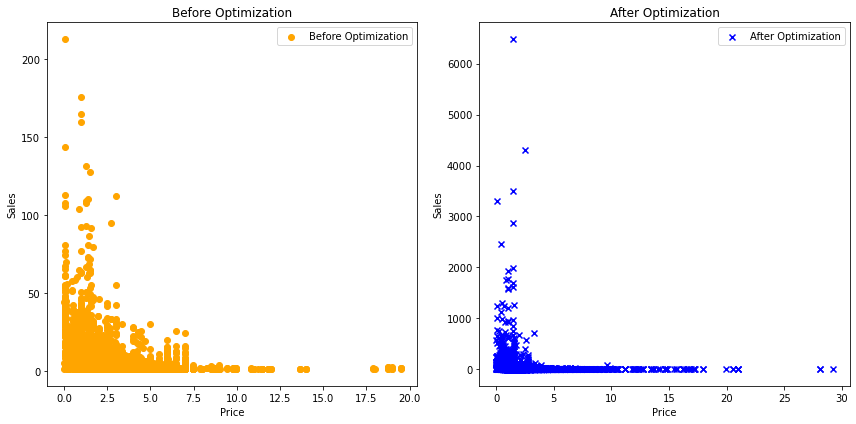

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(f3_df["price"], f3_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(f3_df["opti_price"], f3_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [87]:
household_1=my_data[my_data['dept_id']=="HOUSEHOLD_1"]
household_1 = household_1.drop(household_1[household_1['unit_sale'] == 0].index)

In [88]:
ho1_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = household_1.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        household_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        household_1_df = household_1_df.dropna()

        ho1_df = ho1_df.append(household_1_df, ignore_index=True)

ho1_df['price_change'] = ho1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
ho1_df['sale_change'] = ho1_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
ho1_df['elasticity'] = -ho1_df['sale_change'] / ho1_df['price_change']

ho1_df = f3_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\1558460247.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho1_df = ho1_df.append(household_1_df, ignore_index=True)


In [89]:
# household_1=my_data[my_data['dept_id']=="HOUSEHOLD_1"]
# household_1 = household_1.drop(household_1[household_1['unit_sale'] == 0].index)

# ho1_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in household_1['item_id'].unique():
#     entry_df = household_1[household_1['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 household_1_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 household_1_df = household_1_df.dropna()
                
#                 ho1_df = ho1_df.append(household_1_df, ignore_index=True)

#                 ho1_df['price_change'] = ho1_df['price'].pct_change()*100
#                 ho1_df['sale_change'] = ho1_df['sale_perday'].pct_change()*100
#                 ho1_df['elasticity'] = -ho1_df['sale_change']/ho1_df['price_change'] 
# ho1_df = ho1_df.dropna()
# ho1_df

In [90]:
level_values = []


for elasticity in ho1_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


ho1_df['level'] = level_values
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75,2.657479,1.885609,5.010965
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,-0.757697,Inelastic Demand,4.4,1.0,3.0,2.319788,1.933467,4.485234
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,-0.64486,Inelastic Demand,4.0,1.0,3.0,2.550725,1.644860,4.195584
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97,1.996398,1.487780,2.970200
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97,1.394166,1.724744,2.404580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97,4.029397,1.951850,7.864781
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,-3.620877,Elastic Demand,6.789,2.19,6.57,2.794826,3.581180,10.008774
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,-0.39955,Inelastic Demand,6.394098,1.99,5.97,5.970000,1.285607,7.675074
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,-0.961837,Inelastic Demand,2.0,0.5,1.5,1.019838,1.961837,2.000757


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\4220186867.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho1 = Vis_ho1.append({'item_id': item_id,
C:\Users\hp\AppD

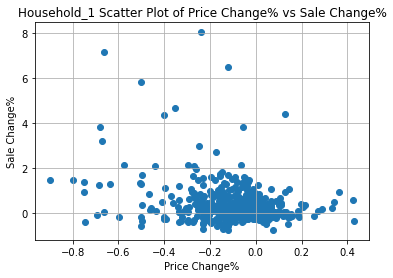

In [91]:
Vis_ho1 = pd.DataFrame()

for item_id in ho1_df['item_id'].unique():
    entry_df = ho1_df[ho1_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_ho1 = Vis_ho1.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_ho1['price_change'], Vis_ho1['sale_change'])

plt.title('Household_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

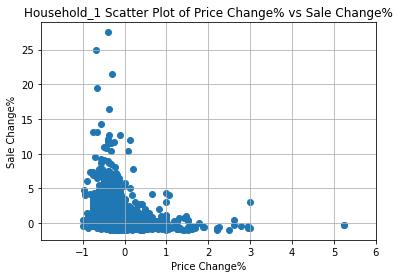

In [92]:
plt.scatter(ho1_df['price_change'], ho1_df['sale_change'])

plt.title('Household_1 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.xlim(ho1_df['price_change'].min()-1, 6)
# plt.ylim(ho1_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [93]:
ho1_df["revenue"] = ho1_df["price"]*ho1_df["sale_perday"]
ho1_df["LB_price"] = ho1_df["price"] - (0.5*ho1_df["price"])
ho1_df["UB_price"] = ho1_df["price"] + (0.5*ho1_df["price"])
ho1_df["elasticity"] = -abs(ho1_df["elasticity"])
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75,2.657479,1.885609,5.010965
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,-0.757697,Inelastic Demand,4.4,1.0,3.0,2.319788,1.933467,4.485234
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,-0.64486,Inelastic Demand,4.0,1.0,3.0,2.550725,1.644860,4.195584
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97,1.996398,1.487780,2.970200
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97,1.394166,1.724744,2.404580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97,4.029397,1.951850,7.864781
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,-3.620877,Elastic Demand,6.789,2.19,6.57,2.794826,3.581180,10.008774
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,-0.39955,Inelastic Demand,6.394098,1.99,5.97,5.970000,1.285607,7.675074
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,-0.961837,Inelastic Demand,2.0,0.5,1.5,1.019838,1.961837,2.000757


In [94]:
for index, row in ho1_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    ho1_df.at[index, "opti_price"] = result.x
    ho1_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    ho1_df.at[index, "optimized_revenue"] = ho1_df.at[index, "optimized_units"] * result.x

In [95]:
ho1_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,FOODS_3_001,FOODS_3,FOODS,CA,2.5,2011,1.997347,0.096491,0.085695,-0.888113,Inelastic Demand,4.993369,1.25,3.75,2.657479,1.885609,5.010965
3,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2012,2.2,-0.2,0.151539,-0.757697,Inelastic Demand,4.4,1.0,3.0,2.319788,1.933467,4.485234
5,FOODS_3_001,FOODS_3,FOODS,CA,2.0,2013,2.0,-0.2,0.128972,-0.64486,Inelastic Demand,4.0,1.0,3.0,2.550725,1.644860,4.195584
7,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2014,1.5,-0.208,-0.204611,-0.983707,Inelastic Demand,2.97,0.99,2.97,1.996398,1.487780,2.970200
9,FOODS_3_001,FOODS_3,FOODS,CA,1.98,2015,1.0,-0.208,-0.509494,-2.449489,Elastic Demand,1.98,0.99,2.97,1.394166,1.724744,2.404580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20825,FOODS_3_825,FOODS_3,FOODS,TX,3.98,2013,1.975779,1.0,0.975779,-0.975779,Inelastic Demand,7.863599,1.99,5.97,4.029397,1.951850,7.864781
20830,FOODS_3_825,FOODS_3,FOODS,WI,4.38,2011,1.55,0.095,-0.343983,-3.620877,Elastic Demand,6.789,2.19,6.57,2.794826,3.581180,10.008774
20831,FOODS_3_825,FOODS_3,FOODS,WI,3.98,2011,1.606557,-0.091324,0.036489,-0.39955,Inelastic Demand,6.394098,1.99,5.97,5.970000,1.285607,7.675074
20843,FOODS_3_826,FOODS_3,FOODS,TX,1.0,2014,2.0,-0.21875,0.210402,-0.961837,Inelastic Demand,2.0,0.5,1.5,1.019838,1.961837,2.000757


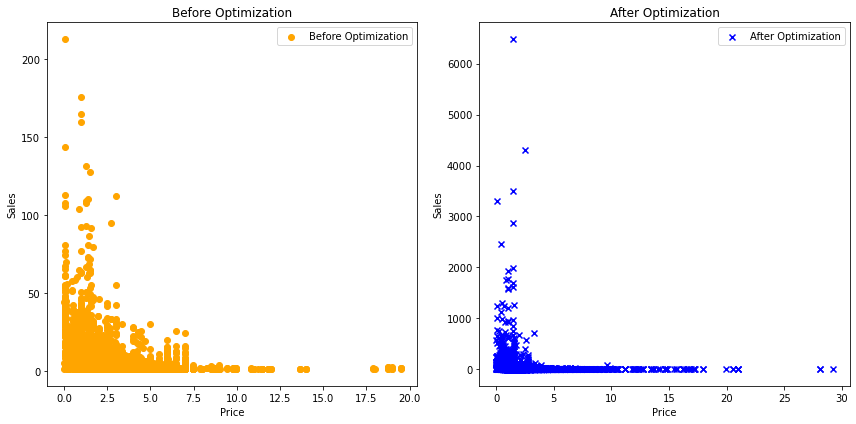

In [96]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ho1_df["price"], ho1_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(ho1_df["opti_price"], ho1_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [97]:
household_2=my_data[my_data['dept_id']=="HOUSEHOLD_2"]
household_2 = household_2.drop(household_2[household_2['unit_sale'] == 0].index)

In [98]:
ho2_df = pd.DataFrame(columns=['item_id', 'dept_id', 'cat_id', 'state_id', 'price', 'year', 'sale_perday', 'price_change', 'sale_change', 'elasticity'])

# Filter the DataFrame once
filtered_df = household_2.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']).filter(lambda x: len(x) > 0)

for (item_id, dept_id, cat_id, state_id, year), group_df in filtered_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year']):
    for sell_price in group_df['sell_price'].unique():
        item_df = group_df[group_df['sell_price'] == sell_price]
        sale_perday = item_df['unit_sale'].mean()

        household_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id': [dept_id], 'cat_id': [cat_id], 'state_id': [state_id], 'price': [sell_price], 'year': [year], 'sale_perday': [sale_perday]})
        household_2_df = household_2_df.dropna()

        ho2_df = ho2_df.append(household_2_df, ignore_index=True)

ho2_df['price_change'] = ho2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['price'].pct_change() 
ho2_df['sale_change'] = ho2_df.groupby(['item_id', 'dept_id', 'cat_id', 'state_id', 'year'])['sale_perday'].pct_change() 
ho2_df['elasticity'] = -ho2_df['sale_change'] / ho2_df['price_change']

ho2_df=ho2_df.dropna()


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\3019003706.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ho2_df = ho2_df.append(household_2_df, ignore_index=True)


In [99]:
# household_2=my_data[my_data['dept_id']=="HOUSEHOLD_2"]
# household_2 = household_2.drop(household_2[household_2['unit_sale'] == 0].index)

# ho2_df = pd.DataFrame(columns=['item_id', 'dept_id','cat_id','price', 'sale_perday','price_change','sale_change','elasticity'])


# for item_id in household_2['item_id'].unique():
#     entry_df = household_2[household_2['item_id'] == item_id]
#     for sell_price in entry_df['sell_price'].unique():
#         for dept_id in entry_df['dept_id'].unique():
#             for cat_id in entry_df['cat_id'].unique():
              
#                 item_df = entry_df[entry_df['sell_price'] == sell_price]
#                 sale_perday = item_df['unit_sale'].mean()


#                 household_2_df = pd.DataFrame({'item_id': [item_id], 'dept_id':[dept_id],'cat_id':[cat_id],'price': [sell_price], 'sale_perday': [sale_perday]})
#                 household_2_df = household_2_df.dropna()

#                 ho2_df = ho2_df.append(household_2_df, ignore_index=True)

#                 ho2_df['price_change'] = ho2_df['price'].pct_change()*100
#                 ho2_df['sale_change'] = ho2_df['sale_perday'].pct_change()*100
#                 ho2_df['elasticity'] = -ho2_df['sale_change']/ho2_df['price_change'] 
# ho2_df=ho2_df.dropna()
# ho2_df

In [100]:
level_values = []


for elasticity in ho2_df['elasticity'].values:
    if abs(elasticity) > 1:
        level_values.append('Elastic Demand')
    elif abs(elasticity) == 1:
        level_values.append('Unitary Elastic Demand')
    elif abs(elasticity) == 0:
        level_values.append('Perfectly Inelastic Demand')
    else:# abs(elasticity) < 1
        level_values.append('Inelastic Demand')


ho2_df['level'] = level_values
ho2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,5.97,2011,1.0,-0.07728,-0.332784,-4.306227,Elastic Demand
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,6.77,2014,1.286689,0.046368,0.023915,-0.515763,Inelastic Demand
10,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,1.99,2012,3.0,-0.692427,1.689655,2.440194,Elastic Demand
13,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,6.77,2014,1.12069,0.046368,-0.057827,1.247141,Elastic Demand
15,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,5.97,2015,1.0,-0.118168,-0.171429,-1.450714,Elastic Demand
...,...,...,...,...,...,...,...,...,...,...,...
11059,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI,19.540001,2015,1.066667,0.089186,0.0,-0.0,Perfectly Inelastic Demand
11067,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,TX,0.98,2015,1.0,-0.502538,-0.19375,-0.385543,Inelastic Demand
11080,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.94,2012,2.0,-0.3367,0.781022,2.319635,Elastic Demand
11081,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.0,2012,9.0,-0.238579,3.5,14.670212,Elastic Demand


C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppData\Local\Temp\ipykernel_17676\2914594791.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Vis_ho2 = Vis_ho2.append({'item_id': item_id,
C:\Users\hp\AppD

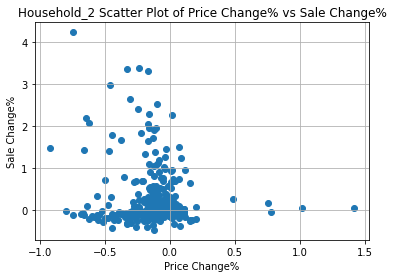

In [101]:
Vis_ho2 = pd.DataFrame()

for item_id in ho2_df['item_id'].unique():
    entry_df = ho2_df[ho2_df['item_id'] == item_id]
    
    price_change = entry_df["price_change"].mean()
    sale_change = entry_df["sale_change"].mean()
    elasticity = entry_df["elasticity"].mean()
    
    Vis_ho2 = Vis_ho2.append({'item_id': item_id,
                    'price_change': price_change,
                    'sale_change': sale_change,
                    'elasticity': elasticity},ignore_index=True)

#V1   
plt.scatter(Vis_ho2['price_change'], Vis_ho2['sale_change'])

plt.title('Household_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
plt.grid(True)

plt.show()

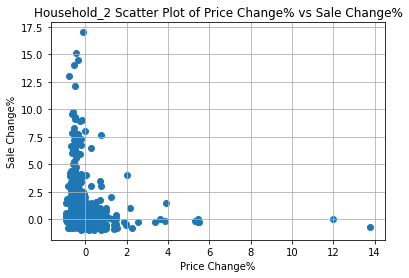

In [102]:
plt.scatter(ho2_df['price_change'], ho2_df['sale_change'])

plt.title('Household_2 Scatter Plot of Price Change% vs Sale Change%')
plt.xlabel('Price Change%')
plt.ylabel('Sale Change%')
# plt.xlim(ho2_df['price_change'].min(), 5)
# plt.ylim(ho2_df['sale_change'].min()-1, 20)  
plt.grid(True)

plt.show()

In [103]:
# ho2_df["price"] = round(ho2_df["price"],2)
ho2_df["revenue"] = ho2_df["price"]*ho2_df["sale_perday"]
ho2_df["LB_price"] = ho2_df["price"] - (0.5*ho2_df["price"])
ho2_df["UB_price"] = ho2_df["price"] + (0.5*ho2_df["price"])
ho2_df["elasticity"] = -abs(ho2_df["elasticity"])
ho2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,5.97,2011,1.0,-0.07728,-0.332784,-4.306227,Elastic Demand,5.97,2.985,8.955
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,6.77,2014,1.286689,0.046368,0.023915,-0.515763,Inelastic Demand,8.710887,3.385,10.155
10,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,1.99,2012,3.0,-0.692427,1.689655,-2.440194,Elastic Demand,5.97,0.995,2.985
13,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,6.77,2014,1.12069,0.046368,-0.057827,-1.247141,Elastic Demand,7.587069,3.385,10.155
15,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,5.97,2015,1.0,-0.118168,-0.171429,-1.450714,Elastic Demand,5.97,2.985,8.955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI,19.540001,2015,1.066667,0.089186,0.0,-0.0,Perfectly Inelastic Demand,20.842668,9.77,29.310001
11067,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,TX,0.98,2015,1.0,-0.502538,-0.19375,-0.385543,Inelastic Demand,0.98,0.49,1.47
11080,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.94,2012,2.0,-0.3367,0.781022,-2.319635,Elastic Demand,7.88,1.97,5.91
11081,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.0,2012,9.0,-0.238579,3.5,-14.670212,Elastic Demand,27.0,1.5,4.5


In [104]:
for index, row in ho2_df.iterrows():
    # Perform optimization for the current row
    result = minimize(objective, x0=row["price"], args=(row,), bounds=[(row["LB_price"],row["UB_price"])])
    # Update DataFrame with optimized price and revenue
    ho2_df.at[index, "opti_price"] = result.x
    ho2_df.at[index, "optimized_units"] = row["sale_perday"] + (row["sale_perday"]*((result.x/row["price"]) - 1)*(row["elasticity"]))
    ho2_df.at[index, "optimized_revenue"] = ho2_df.at[index, "optimized_units"] * result.x

In [105]:
ho2_df

,item_id,dept_id,cat_id,state_id,price,year,sale_perday,price_change,sale_change,elasticity,level,revenue,LB_price,UB_price,opti_price,optimized_units,optimized_revenue
1,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,5.97,2011,1.0,-0.07728,-0.332784,-4.306227,Elastic Demand,5.97,2.985,8.955,3.678182,2.653114,9.758635
5,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,CA,6.77,2014,1.286689,0.046368,0.023915,-0.515763,Inelastic Demand,8.710887,3.385,10.155,9.948100,0.975158,9.700965
10,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,1.99,2012,3.0,-0.692427,1.689655,-2.440194,Elastic Demand,5.97,0.995,2.985,1.402754,5.160291,7.238621
13,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,6.77,2014,1.12069,0.046368,-0.057827,-1.247141,Elastic Demand,7.587069,3.385,10.155,6.099209,1.259174,7.679963
15,HOUSEHOLD_2_001,HOUSEHOLD_2,HOUSEHOLD,TX,5.97,2015,1.0,-0.118168,-0.171429,-1.450714,Elastic Demand,5.97,2.985,8.955,5.042608,1.225357,6.178994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11059,HOUSEHOLD_2_514,HOUSEHOLD_2,HOUSEHOLD,WI,19.540001,2015,1.066667,0.089186,0.0,-0.0,Perfectly Inelastic Demand,20.842668,9.77,29.310001,29.310001,1.066667,31.264001
11067,HOUSEHOLD_2_515,HOUSEHOLD_2,HOUSEHOLD,TX,0.98,2015,1.0,-0.502538,-0.19375,-0.385543,Inelastic Demand,0.98,0.49,1.47,1.470000,0.807229,1.186626
11080,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.94,2012,2.0,-0.3367,0.781022,-2.319635,Elastic Demand,7.88,1.97,5.91,2.819271,3.319635,9.358953
11081,HOUSEHOLD_2_516,HOUSEHOLD_2,HOUSEHOLD,TX,3.0,2012,9.0,-0.238579,3.5,-14.670212,Elastic Demand,27.0,1.5,4.5,1.602248,70.515954,112.984048


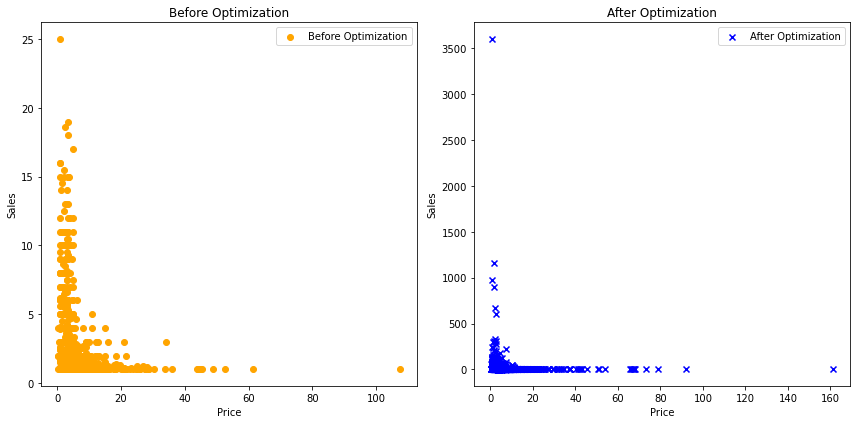

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ho2_df["price"], ho2_df["sale_perday"], color='orange', label='Before Optimization') 
plt.xlabel('Price')  
plt.ylabel('Sales')  
plt.title('Before Optimization')  
plt.legend() 
plt.subplot(1, 2, 2)
plt.scatter(ho2_df["opti_price"], ho2_df["optimized_units"], color='blue', marker='x',label='After Optimization')
plt.xlabel('Price') 
plt.ylabel('Sales')  
plt.title('After Optimization')  
plt.legend()  

plt.tight_layout() 
plt.show() 

In [113]:
elasticity_dicts=[]

In [114]:
for cat_id in my_data.cat_id.unique():
    entry={}
    entry_df=my_data[my_data.cat_id==cat_id]
   
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(cat_id,':','elasticity=',model.params[1])
        #print(cat_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(cat_id,':', 'No valid data for regression')
    entry['Category']=cat_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_cat=pd.DataFrame(elasticity_dicts)

HOBBIES : elasticity= -0.26230932523336253
HOUSEHOLD : elasticity= -0.3623659016598186
FOODS : elasticity= -0.4319639813218394


In [115]:
elasticity_cat

,Category,elasticity
0,HOBBIES,-0.262309
1,HOUSEHOLD,-0.362366
2,FOODS,-0.431964


In [116]:
from sklearn.preprocessing import PolynomialFeatures

elasticity_dicts = []

for cat_id in my_data.cat_id.unique():
    entry = {}
    entry_df = my_data[my_data.cat_id == cat_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        
        poly = sm.add_constant(X_poly)
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(cat_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

HOBBIES : elasticity= -0.51328814 ,sensitivity level: Inelastic Demand
HOUSEHOLD : elasticity= -0.86524695 ,sensitivity level: Inelastic Demand
FOODS : elasticity= -0.5395993 ,sensitivity level: Inelastic Demand


In [117]:
X_value=np.log(my_data.groupby("dept_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('dept_id')["unit_sale"].sum())

In [118]:
X = sm.add_constant(X_value)

In [119]:
model_dept = sm.OLS(y_value, X).fit()

In [120]:
print(model_dept.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.185
Method:                 Least Squares   F-statistic:                   0.06465
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.809
Time:                        20:08:21   Log-Likelihood:                -11.003
No. Observations:                   7   AIC:                             26.01
Df Residuals:                       5   BIC:                             25.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9220      2.389      6.245      0.0

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


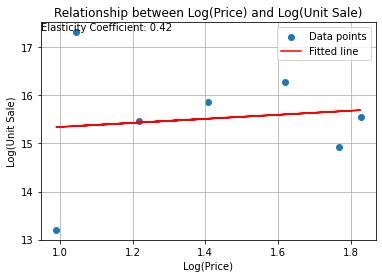

In [121]:

coefficient = model_dept.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_dept.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
elasticity_dicts=[]

In [123]:
for dept_id in my_data.dept_id.unique():
    entry={}
    entry_df=my_data[my_data.dept_id==dept_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(dept_id,':','elasticity=',model.params[1])
        #print(dept_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(dept_id,':', 'No valid data for regression')
    entry['Department']=dept_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_dept=pd.DataFrame(elasticity_dicts)

HOBBIES_1 : elasticity= -0.3050555884519819
HOBBIES_2 : elasticity= -0.12786563203944085
HOUSEHOLD_1 : elasticity= -0.37550897701332797
HOUSEHOLD_2 : elasticity= -0.14644530647003312
FOODS_1 : elasticity= -0.3692719597496199
FOODS_2 : elasticity= -0.32421028033196797
FOODS_3 : elasticity= -0.45744143345466826


In [124]:
elasticity_dept

,Department,elasticity
0,HOBBIES_1,-0.305056
1,HOBBIES_2,-0.127866
2,HOUSEHOLD_1,-0.375509
3,HOUSEHOLD_2,-0.146445
4,FOODS_1,-0.369272
5,FOODS_2,-0.324210
6,FOODS_3,-0.457441


In [125]:
elasticity_dicts = []

for dept_id in my_data.dept_id.unique():
    entry = {}
    entry_df = my_data[my_data.dept_id == dept_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(dept_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

HOBBIES_1 : elasticity= -0.6156592 ,sensitivity level: Inelastic Demand
HOBBIES_2 : elasticity= -0.17806497 ,sensitivity level: Inelastic Demand
HOUSEHOLD_1 : elasticity= -0.8999993 ,sensitivity level: Inelastic Demand
HOUSEHOLD_2 : elasticity= -0.20574239 ,sensitivity level: Inelastic Demand
FOODS_1 : elasticity= -0.9299321 ,sensitivity level: Inelastic Demand
FOODS_2 : elasticity= -1.021008 ,sensitivity level: Elastic Demand
FOODS_3 : elasticity= -0.48617503 ,sensitivity level: Inelastic Demand


In [126]:
X_value=np.log(my_data.groupby("state_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('state_id')["unit_sale"].sum())

In [127]:
X = sm.add_constant(X_value)

In [128]:
model_state = sm.OLS(y_value, X).fit()

In [129]:
print(model_state.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.983
Method:                 Least Squares   F-statistic:                  0.008436
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.942
Time:                        20:09:28   Log-Likelihood:                0.48720
No. Observations:                   3   AIC:                             3.026
Df Residuals:                       1   BIC:                             1.223
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1860     51.308      0.238      0.8

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


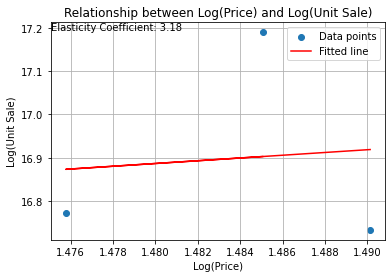

In [130]:

coefficient = model_state.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_state.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
elasticity_dicts=[]

In [132]:
for state_id in my_data.state_id.unique():
    entry={}
    entry_df=my_data[my_data.state_id==state_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(state_id,':','elasticity=',model.params[1])
        #print(state_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(state_id,':', 'No valid data for regression')
    entry['Department']=state_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_state=pd.DataFrame(elasticity_dicts)

CA : elasticity= -0.3879413025438883
TX : elasticity= -0.3773369635910164
WI : elasticity= -0.4136240443712191


In [133]:
elasticity_state

,Department,elasticity
0,CA,-0.387941
1,TX,-0.377337
2,WI,-0.413624


In [134]:
elasticity_dicts = []

for state_id in my_data.state_id.unique():
    entry = {}
    entry_df = my_data[my_data.state_id == state_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(state_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

CA : elasticity= -0.49642023 ,sensitivity level: Inelastic Demand
TX : elasticity= -0.49649376 ,sensitivity level: Inelastic Demand
WI : elasticity= -0.5340249 ,sensitivity level: Inelastic Demand


In [135]:
X_value=np.log(my_data.groupby("store_id")["sell_price"].mean())
y_value=np.log(my_data.groupby('store_id')["unit_sale"].sum())

In [136]:
X = sm.add_constant(X_value)

In [137]:
model_store = sm.OLS(y_value, X).fit()

In [138]:
print(model_store.summary())

                            OLS Regression Results                            
Dep. Variable:              unit_sale   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.420
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.268
Time:                        20:16:58   Log-Likelihood:                0.42609
No. Observations:                  10   AIC:                             3.148
Df Residuals:                       8   BIC:                             3.753
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9169     17.822      2.071      0.0

c:\Users\hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


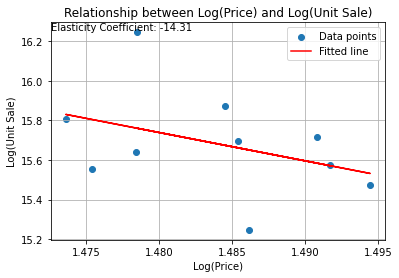

In [139]:
coefficient = model_store.params[1]
plt.scatter(X_value, y_value, label='Data points')

# Plot the fitted line
plt.plot(X_value, model_store.predict(X), color='red', label='Fitted line')

plt.xlabel('Log(Price)')
plt.ylabel('Log(Unit Sale)')
plt.title('Relationship between Log(Price) and Log(Unit Sale)')
plt.text(plt.xlim()[0], plt.ylim()[1], f'Elasticity Coefficient: {coefficient:.2f}', ha='left', va='top')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
elasticity_dicts=[]

In [141]:
for store_id in my_data.store_id.unique():
    entry={}
    entry_df=my_data[my_data.store_id==store_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value=np.log(entry_df.unit_sale)
        X_value=np.log(entry_df.sell_price)
        X = sm.add_constant(X_value)
        model = sm.OLS(y_value, X).fit()
        print(store_id,':','elasticity=',model.params[1])
        #print(store_id,':','elasticity=',model.params[1]*(X_value.mean()/y_value.mean()))
    else:
        print(store_id,':', 'No valid data for regression')
    entry['Store']=store_id
    entry['elasticity']=model.params[1]
    #entry['elasticity']=model.params[1]*(X_value.mean()/y_value.mean())
    elasticity_dicts.append(entry)
elasticity_store=pd.DataFrame(elasticity_dicts)

CA_1 : elasticity= -0.4090038859764377
CA_2 : elasticity= -0.34979792573053925
CA_3 : elasticity= -0.4438411870124484
CA_4 : elasticity= -0.3431553733551852
TX_1 : elasticity= -0.3796984232612194
TX_2 : elasticity= -0.38909371482692434
TX_3 : elasticity= -0.3633118550139723
WI_1 : elasticity= -0.37350960470347816
WI_2 : elasticity= -0.44042454751131715
WI_3 : elasticity= -0.4290966694375496


In [142]:
elasticity_store

,Store,elasticity
0,CA_1,-0.409004
1,CA_2,-0.349798
2,CA_3,-0.443841
3,CA_4,-0.343155
4,TX_1,-0.379698
5,TX_2,-0.389094
6,TX_3,-0.363312
7,WI_1,-0.373510
8,WI_2,-0.440425
9,WI_3,-0.429097


In [143]:
elasticity_dicts = []

for store_id in my_data.store_id.unique():
    entry = {}
    entry_df = my_data[my_data.store_id == store_id]
    
    # Filter out invalid data
    entry_df = entry_df[(entry_df.unit_sale > 0) & (entry_df.sell_price > 0)]
    
    if not entry_df.empty:
        y_value = np.log(entry_df.unit_sale)
        X_value = np.log(entry_df.sell_price).values.reshape(-1, 1)
        
        poly = PolynomialFeatures(degree=2)  
        X_poly = poly.fit_transform(X_value)
        poly = sm.add_constant(X_poly)
        
        model = sm.OLS(y_value, poly).fit()
        elasticity_coefficient = model.params[1]
        #elasticity_coefficient = model.params[1]*(X_value.mean()/y_value.mean())
        if abs(elasticity_coefficient)>1:
            level = 'Elastic Demand'
        elif abs(elasticity_coefficient)==1:
            level = 'Unitary Elastic Demand'
        elif abs(elasticity_coefficient)<1:
            level='Inelastic Demand'
        elif abs(elasticity_coefficient)==0:
            level='Perfectly Inelastic Demand'
        else:
            level='Perfectly Elastic Demand'
        print(store_id, ':', 'elasticity=', elasticity_coefficient,',sensitivity level:',level)

CA_1 : elasticity= -0.5158361 ,sensitivity level: Inelastic Demand
CA_2 : elasticity= -0.39972478 ,sensitivity level: Inelastic Demand
CA_3 : elasticity= -0.5881433 ,sensitivity level: Inelastic Demand
CA_4 : elasticity= -0.46522355 ,sensitivity level: Inelastic Demand
TX_1 : elasticity= -0.48442423 ,sensitivity level: Inelastic Demand
TX_2 : elasticity= -0.52232623 ,sensitivity level: Inelastic Demand
TX_3 : elasticity= -0.48063073 ,sensitivity level: Inelastic Demand
WI_1 : elasticity= -0.45853296 ,sensitivity level: Inelastic Demand
WI_2 : elasticity= -0.5893807 ,sensitivity level: Inelastic Demand
WI_3 : elasticity= -0.5610014 ,sensitivity level: Inelastic Demand


In [144]:
h1_df.to_csv('h1_df.csv')
h2_df.to_csv('h2_df.csv')
ho1_df.to_csv('ho1_df.csv')
ho2_df.to_csv('ho2_df.csv')
f1_df.to_csv('f1_df.csv')
f2_df.to_csv('f2_df.csv')
f3_df.to_csv('f3_df.csv')